<a href="https://colab.research.google.com/github/fatmaabiyya/F/blob/main/KRBandar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Resample Weather Kolam Renang Bandar

In [ ]:
# Read dataset
data = pd.read_excel('/content/drive/MyDrive/Skripsi/KRBandar/Cuaca KRBandar 1999-2024.xlsx')
data.head()

,time,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-01,22.4,26.3,0,0,0,1
1,1999-01-02,22.7,25.6,0,0,0,1
2,1999-01-03,22.3,24.3,0,0,0,1
3,1999-01-04,21.8,26.8,0,0,0,1
4,1999-01-05,22.2,27.0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     9497 non-null   datetime64[ns]
 1   tempmin  9497 non-null   float64       
 2   tempmax  9497 non-null   float64       
 3   clear    9497 non-null   int64         
 4   cloudy   9497 non-null   int64         
 5   drizzle  9497 non-null   int64         
 6   rain     9497 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 519.5 KB


### Pre processing Data

In [ ]:
# Pengecekan missing value
data.isnull().sum()

,0
time,0
tempmin,0
tempmax,0
clear,0
cloudy,0
drizzle,0
rain,0


In [ ]:
# Pengecekan duplikasi data
sum(data.duplicated())

0

Text(0.5, 1.0, 'Temperature Minimum')

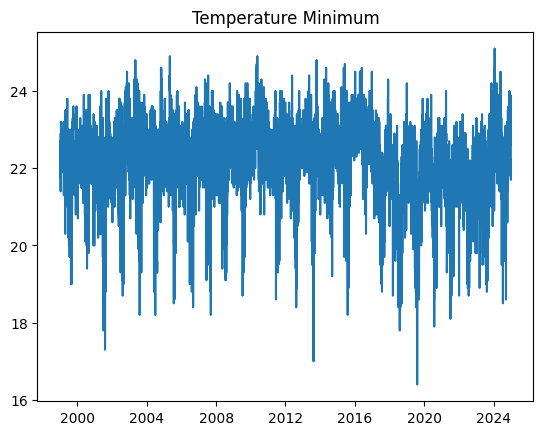

In [ ]:
plt.plot(data['time'], data['tempmin'])
plt.title('Temperature Minimum')

Text(0.5, 1.0, 'Temperature Maximum')

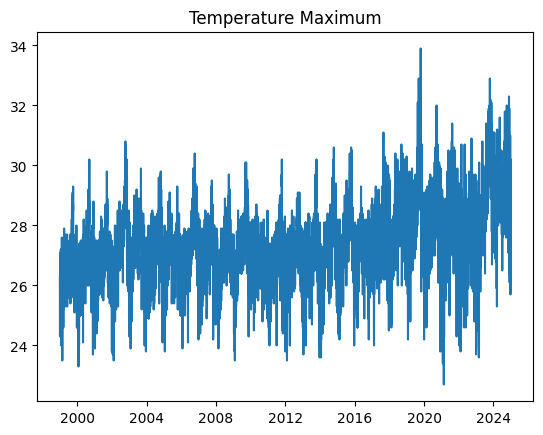

In [ ]:
plt.plot(data['time'], data['tempmax'])
plt.title('Temperature Maximum')

### Resample per Month

In [ ]:
monthly_data = data.set_index('time').resample('ME').agg({
    'tempmin': 'mean',
    'tempmax': 'mean',
    'clear': 'sum',
    'cloudy': 'sum',
    'drizzle': 'sum',
    'rain': 'sum',
})

# Pembulatan
monthly_data['tempmin'] = monthly_data['tempmin'].round(1)
monthly_data['tempmax'] = monthly_data['tempmax'].round(1)

display(monthly_data)

,tempmin,tempmax,clear,cloudy,drizzle,rain
time,,,,,,
1999-01-31,22.4,26.2,0,0,4,27
1999-02-28,22.3,26.1,0,0,10,18
1999-03-31,22.4,26.7,0,0,9,22
1999-04-30,22.3,27.0,0,0,10,20
1999-05-31,22.5,26.9,0,3,14,14
...,...,...,...,...,...,...
2024-08-31,21.3,29.6,0,11,16,4
2024-09-30,21.6,29.6,0,7,13,10
2024-10-31,22.3,30.5,0,3,13,15


In [ ]:
monthly_data.reset_index(inplace=True)
monthly_data.head()

,time,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,22.4,26.2,0,0,4,27
1,1999-02-28,22.3,26.1,0,0,10,18
2,1999-03-31,22.4,26.7,0,0,9,22
3,1999-04-30,22.3,27.0,0,0,10,20
4,1999-05-31,22.5,26.9,0,3,14,14


## Merge Data Kolam Renang Bandar

In [ ]:
# Read data visitor
pdata = pd.read_excel('/content/drive/MyDrive/Skripsi/KRBandar/Pengunjung KRBandar 1999-2024.xlsx')
pdata.head()

,date,visitor
0,1999-01-31,1600
1,1999-02-28,500
2,1999-03-31,2500
3,1999-04-30,1500
4,1999-05-31,2800


In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     312 non-null    datetime64[ns]
 1   visitor  312 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.0 KB


### Preprocessing Data

In [ ]:
# Check missing value
pdata.isnull().sum()

,0
date,0
visitor,0


In [ ]:
# data visitor 0
pdata[pdata['visitor'] == 0]

,date,visitor
84,2006-01-31,0
85,2006-02-28,0
86,2006-03-31,0
87,2006-04-30,0
88,2006-05-31,0
89,2006-06-30,0
90,2006-07-31,0
91,2006-08-31,0
92,2006-09-30,0
93,2006-10-31,0


*   Data tahun 2006 tidak dapat ditemukan
*   Pada tahun 2013-2014 Kolam Renang Bandar sedang direnovasi
*   Pada tahun 2020-2021 Penutupan tempat wisata karena Covid-19





In [ ]:
# jika nilai visitor 0 maka isi dengan nilai mean
pdata['visitor'] = pdata['visitor'].replace(0, pdata['visitor'].mean().round(1))
pdata

,date,visitor
0,1999-01-31,1600.0
1,1999-02-28,500.0
2,1999-03-31,2500.0
3,1999-04-30,1500.0
4,1999-05-31,2800.0
...,...,...
307,2024-08-31,2220.0
308,2024-09-30,3503.0
309,2024-10-31,2797.0
310,2024-11-30,2257.0


In [ ]:
# Check Duplikasi data
sum(pdata.duplicated())

0

In [ ]:
# Merge data visitor & weather
monthly_data = pd.merge(pdata, monthly_data, left_on='date', right_on='time')
monthly_data

,date,visitor,time,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,1999-01-31,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,1999-02-28,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,1999-03-31,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,1999-04-30,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,1999-05-31,22.5,26.9,0,3,14,14
...,...,...,...,...,...,...,...,...,...
307,2024-08-31,2220.0,2024-08-31,21.3,29.6,0,11,16,4
308,2024-09-30,3503.0,2024-09-30,21.6,29.6,0,7,13,10
309,2024-10-31,2797.0,2024-10-31,22.3,30.5,0,3,13,15
310,2024-11-30,2257.0,2024-11-30,22.8,29.5,0,0,3,27


In [ ]:
# remove column 'time'
monthly_data.drop('time', axis=1, inplace=True)
monthly_data.head()

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14


Data Kolam Renang Bandar per bulan pada tahun 1999-2024 telah siap digunakan sebagai penunjang analisis.

In [ ]:
# download excel monthly_data
#monthly_data.to_excel('monthly_data 1999-2024.xlsx', index=False)

## Exploratory Data Analysis(EDA)

In [ ]:
monthly_data.head()

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14


In [ ]:
# info
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     312 non-null    datetime64[ns]
 1   visitor  312 non-null    float64       
 2   tempmin  312 non-null    float64       
 3   tempmax  312 non-null    float64       
 4   clear    312 non-null    int64         
 5   cloudy   312 non-null    int64         
 6   drizzle  312 non-null    int64         
 7   rain     312 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 19.6 KB


In [ ]:
# shape
monthly_data.shape

(312, 8)

In [ ]:
# missing value
monthly_data.isnull().sum()

,0
date,0
visitor,0
tempmin,0
tempmax,0
clear,0
cloudy,0
drizzle,0
rain,0


In [ ]:
# Check Duplikasi data
sum(monthly_data.duplicated())

0

In [ ]:
# Statistika Deskriptif
monthly_data.describe()

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
count,312,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2012-01-14 21:27:41.538461440,2685.147115,22.177885,27.370833,0.009615,2.705128,11.147436,16.576923
min,1999-01-31 00:00:00,70.000000,20.000000,25.400000,0.000000,0.000000,0.000000,0.000000
25%,2005-07-23 06:00:00,1307.500000,21.875000,26.700000,0.000000,0.000000,6.000000,9.000000
50%,2012-01-15 12:00:00,2206.000000,22.300000,27.200000,0.000000,1.000000,11.000000,19.000000
75%,2018-07-07 18:00:00,3213.250000,22.600000,27.825000,0.000000,4.000000,16.000000,24.000000
max,2024-12-31 00:00:00,14564.000000,23.800000,31.100000,1.000000,17.000000,25.000000,31.000000
std,NaN,2225.322302,0.617841,0.953964,0.097742,4.043522,5.996038,8.735144


### Distribusi Data

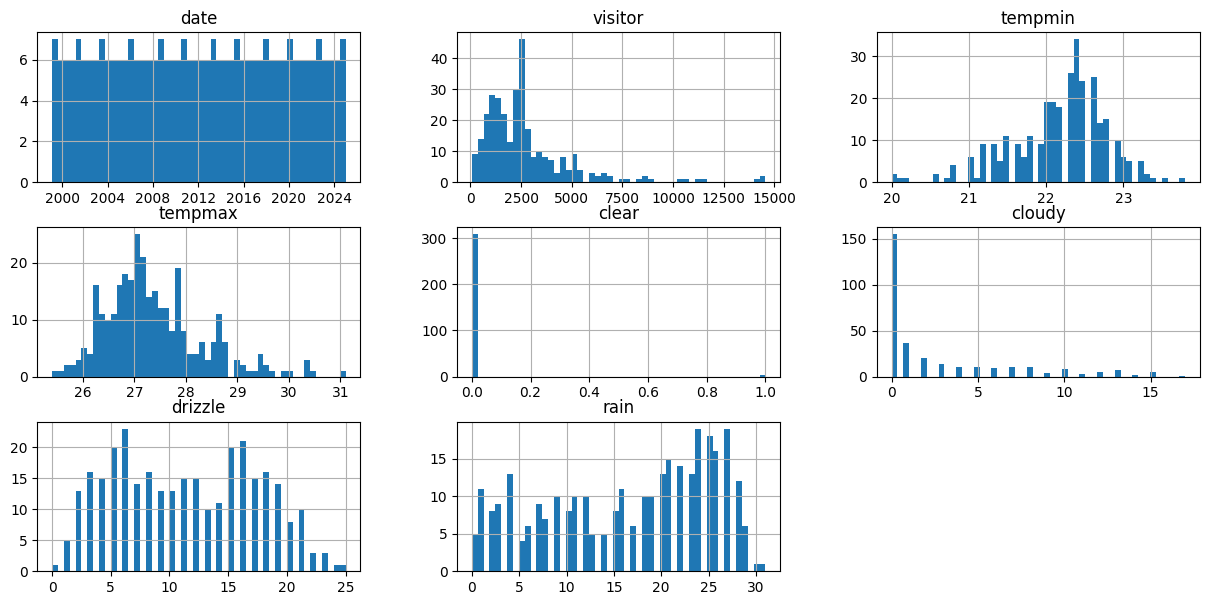

In [ ]:
# histogram
monthly_data.hist(bins=50, figsize=(15,7))
plt.show()

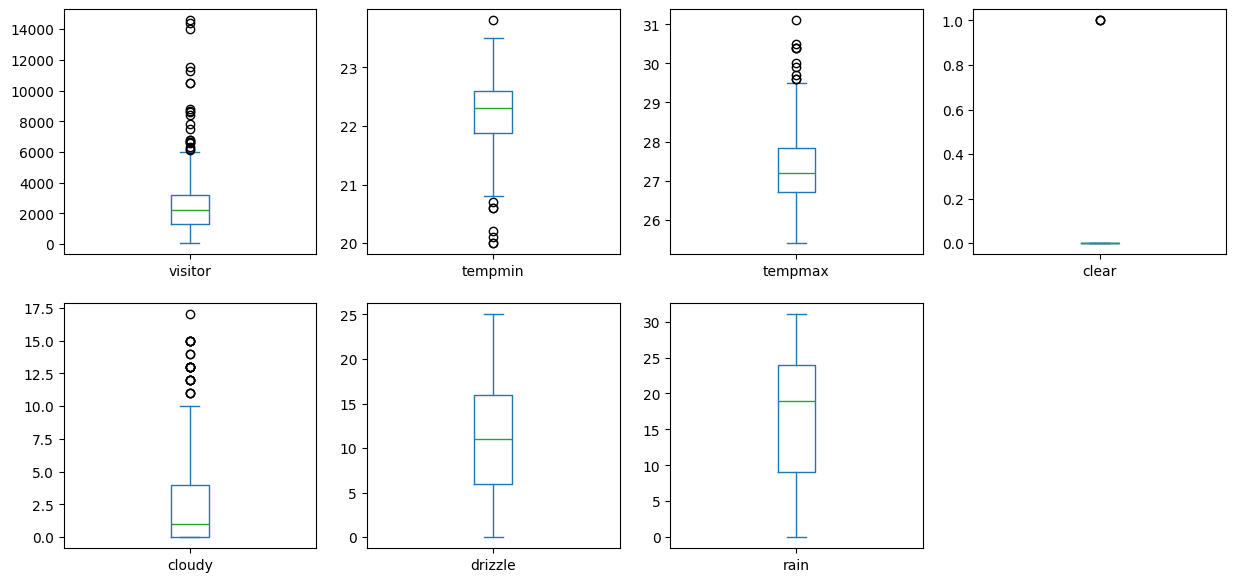

In [ ]:
# boxplot
monthly_data.plot(kind='box', subplots=True, layout=(2,4), figsize=(15,7))
plt.show()

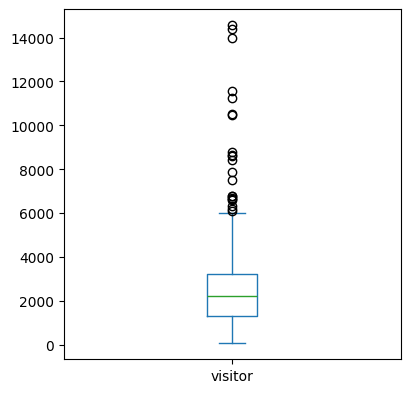

In [ ]:
# boxplot visitor
monthly_data['visitor'].plot(kind='box', subplots=True, layout=(2,4), figsize=(20,10))
plt.show()

In [ ]:
# cek outlier
q1 = monthly_data['visitor'].quantile(0.25)
q3 = monthly_data['visitor'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = monthly_data[(monthly_data['visitor'] < lower_bound) | (monthly_data['visitor'] > upper_bound)]
print(outliers)

          date  visitor  tempmin  tempmax  clear  cloudy  drizzle  rain
6   1999-07-31   6593.0     21.2     26.2      0       2       22     7
36  2002-01-31   6800.0     22.3     26.0      0       0        9    22
105 2007-10-31   6100.0     22.8     27.8      0       3       16    12
117 2008-10-31   6650.0     23.0     27.9      0       2        8    21
131 2009-12-31  10513.0     22.6     27.0      0       2        8    21
210 2016-07-31  10490.0     22.7     27.2      0       3       15    13
222 2017-07-31  14564.0     21.2     27.6      0       2       18    11
233 2018-06-30  11558.0     21.3     28.0      0       2       21     7
239 2018-12-31   8800.0     22.5     27.6      0       0        6    25
240 2019-01-31   7854.0     22.4     27.1      0       0        4    27
245 2019-06-30  14382.0     21.0     28.2      0      10       16     4
246 2019-07-31  11240.0     20.2     28.2      0      15       13     3
252 2020-01-31   6314.0     22.5     27.4      0       0        

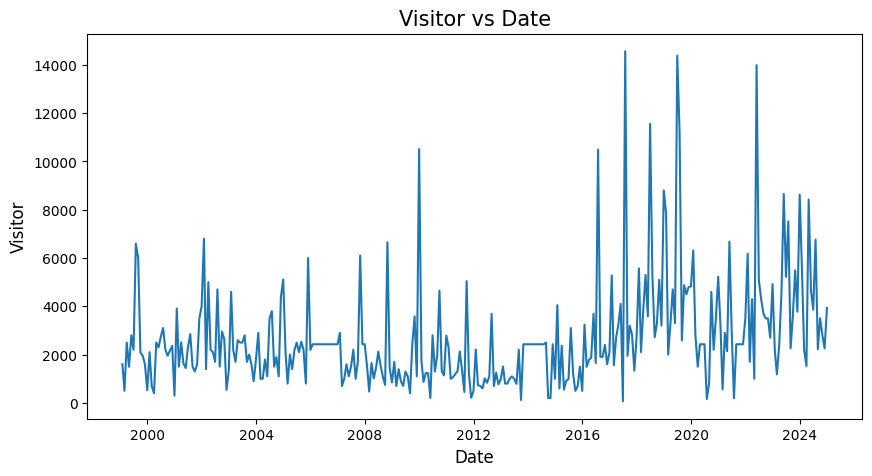

In [ ]:
# line plot visitor vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['visitor'],data=monthly_data)
ax.set_title("Visitor vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Visitor', fontsize=12)
plt.show()

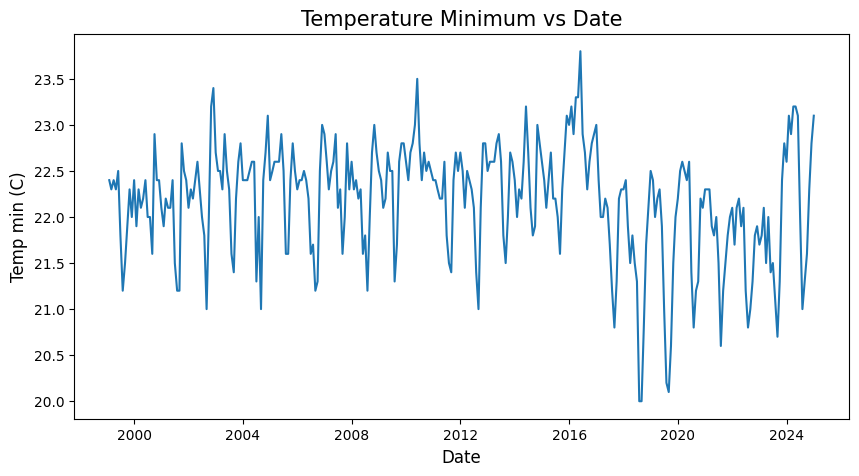

In [ ]:
# line plot tempmin vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['tempmin'],data=monthly_data)
ax.set_title("Temperature Minimum vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Temp min (C)', fontsize=12)
plt.show()

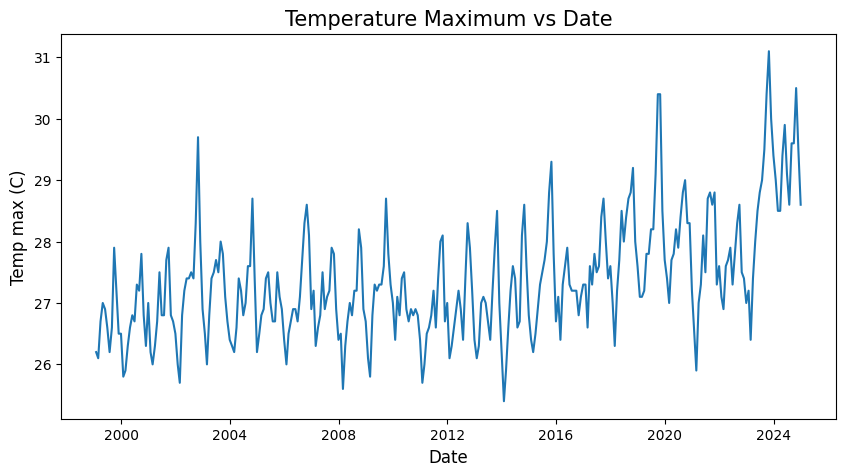

In [ ]:
# line plot tempmax vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['tempmax'],data=monthly_data)
ax.set_title("Temperature Maximum vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Temp max (C)', fontsize=12)
plt.show()

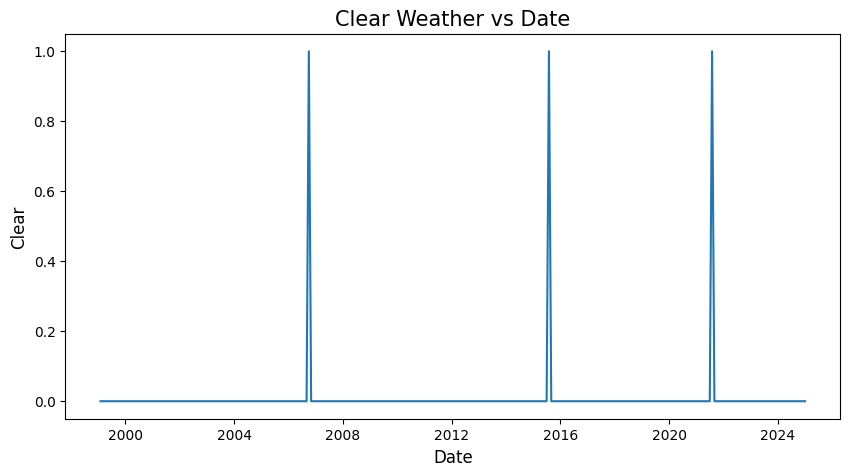

In [ ]:
# line plot clear vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['clear'],data=monthly_data)
ax.set_title("Clear Weather vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Clear', fontsize=12)
plt.show()

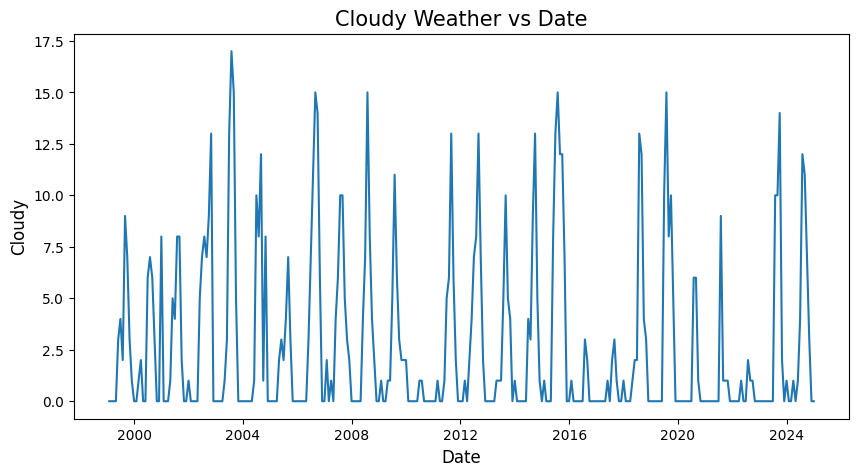

In [ ]:
# line plot cloudy vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['cloudy'],data=monthly_data)
ax.set_title("Cloudy Weather vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Cloudy', fontsize=12)
plt.show()

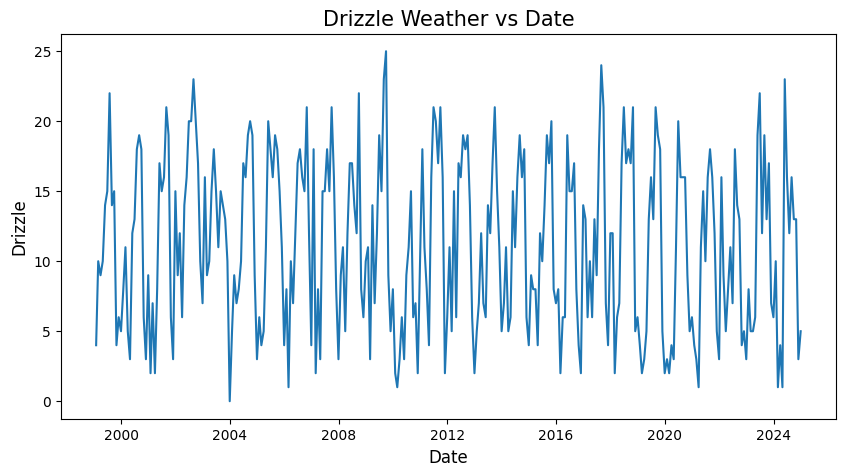

In [ ]:
# line plot drizzle vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['drizzle'],data=monthly_data)
ax.set_title("Drizzle Weather vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Drizzle', fontsize=12)
plt.show()

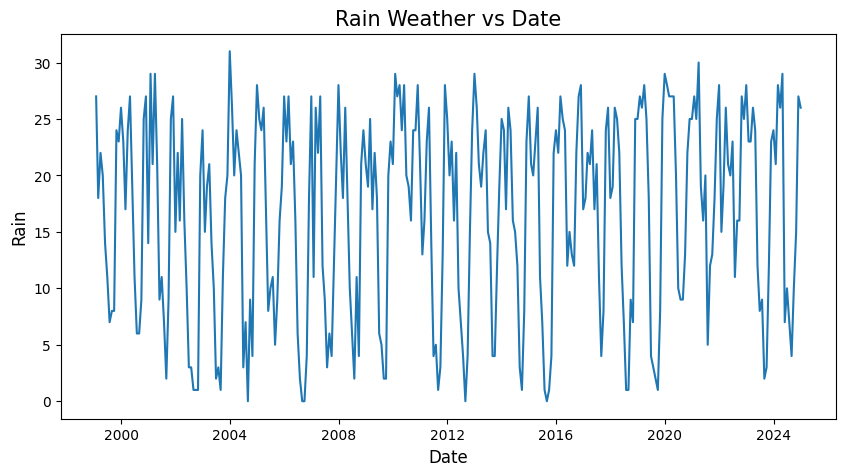

In [ ]:
# line plot rain vs date
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_data['date'], y=monthly_data['rain'],data=monthly_data)
ax.set_title("Rain Weather vs Date", fontsize=15)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel('Rain', fontsize=12)
plt.show()

<Axes: >

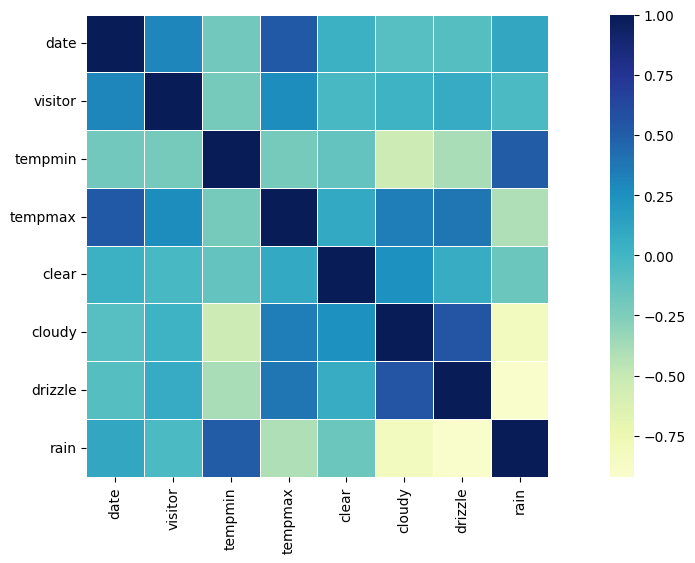

In [ ]:
# Feature correlations
plt.figure(figsize=(16,6))
sns.heatmap(monthly_data.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0)

In [ ]:
# download monthly_data excel
monthly_data.to_excel('monthly_data.xlsx', index=False)

# Random Forest Regressor

### Exploratory Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
monthly_data

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14
...,...,...,...,...,...,...,...,...
307,2024-08-31,2220.0,21.3,29.6,0,11,16,4
308,2024-09-30,3503.0,21.6,29.6,0,7,13,10
309,2024-10-31,2797.0,22.3,30.5,0,3,13,15
310,2024-11-30,2257.0,22.8,29.5,0,0,3,27


In [ ]:
# feature & target
x=monthly_data.drop(['date','visitor'],axis=1)
y=monthly_data['visitor']

In [ ]:
monthly_data.head()

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14


In [ ]:
# splitting
train_data,test_data=train_test_split(monthly_data,test_size=0.2,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 249 
The size of testing data is: 63


In [ ]:
train_data.shape, test_data.shape

((249, 8), (63, 8))

In [ ]:
train_data, test_data

(          date  visitor  tempmin  tempmax  clear  cloudy  drizzle  rain
 182 2014-03-31   2428.3     22.2     26.6      0       0        5    26
 72  2005-01-31   2100.0     22.5     26.5      0       0        6    25
 90  2006-07-31   2428.3     21.7     27.1      0      11       18     2
 197 2015-06-30    985.0     22.2     27.5      0      13       10     7
 24  2001-01-31   3908.0     21.9     26.2      0       0        2    29
 ..         ...      ...      ...      ...    ...     ...      ...   ...
 71  2004-12-31   5111.0     22.4     26.2      0       0        3    28
 278 2022-03-31   4300.0     22.2     27.6      0       0        5    26
 218 2017-03-31   2712.0     22.0     27.6      0       0       10    21
 223 2017-08-31   1950.0     20.8     28.4      0       3       24     4
 271 2021-08-31   2428.3     21.2     28.8      0       1       18    12
 
 [249 rows x 8 columns],
           date  visitor  tempmin  tempmax  clear  cloudy  drizzle  rain
 62  2004-03-31   1000.0

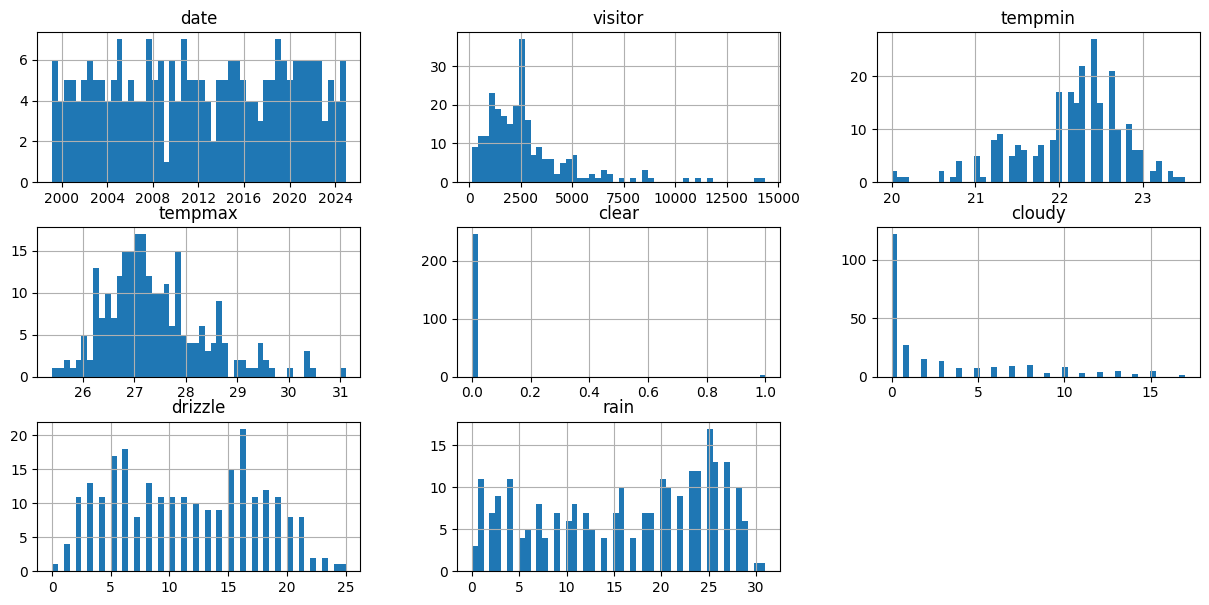

In [ ]:
train_data.hist(bins=50,figsize=(15,7))
plt.show()

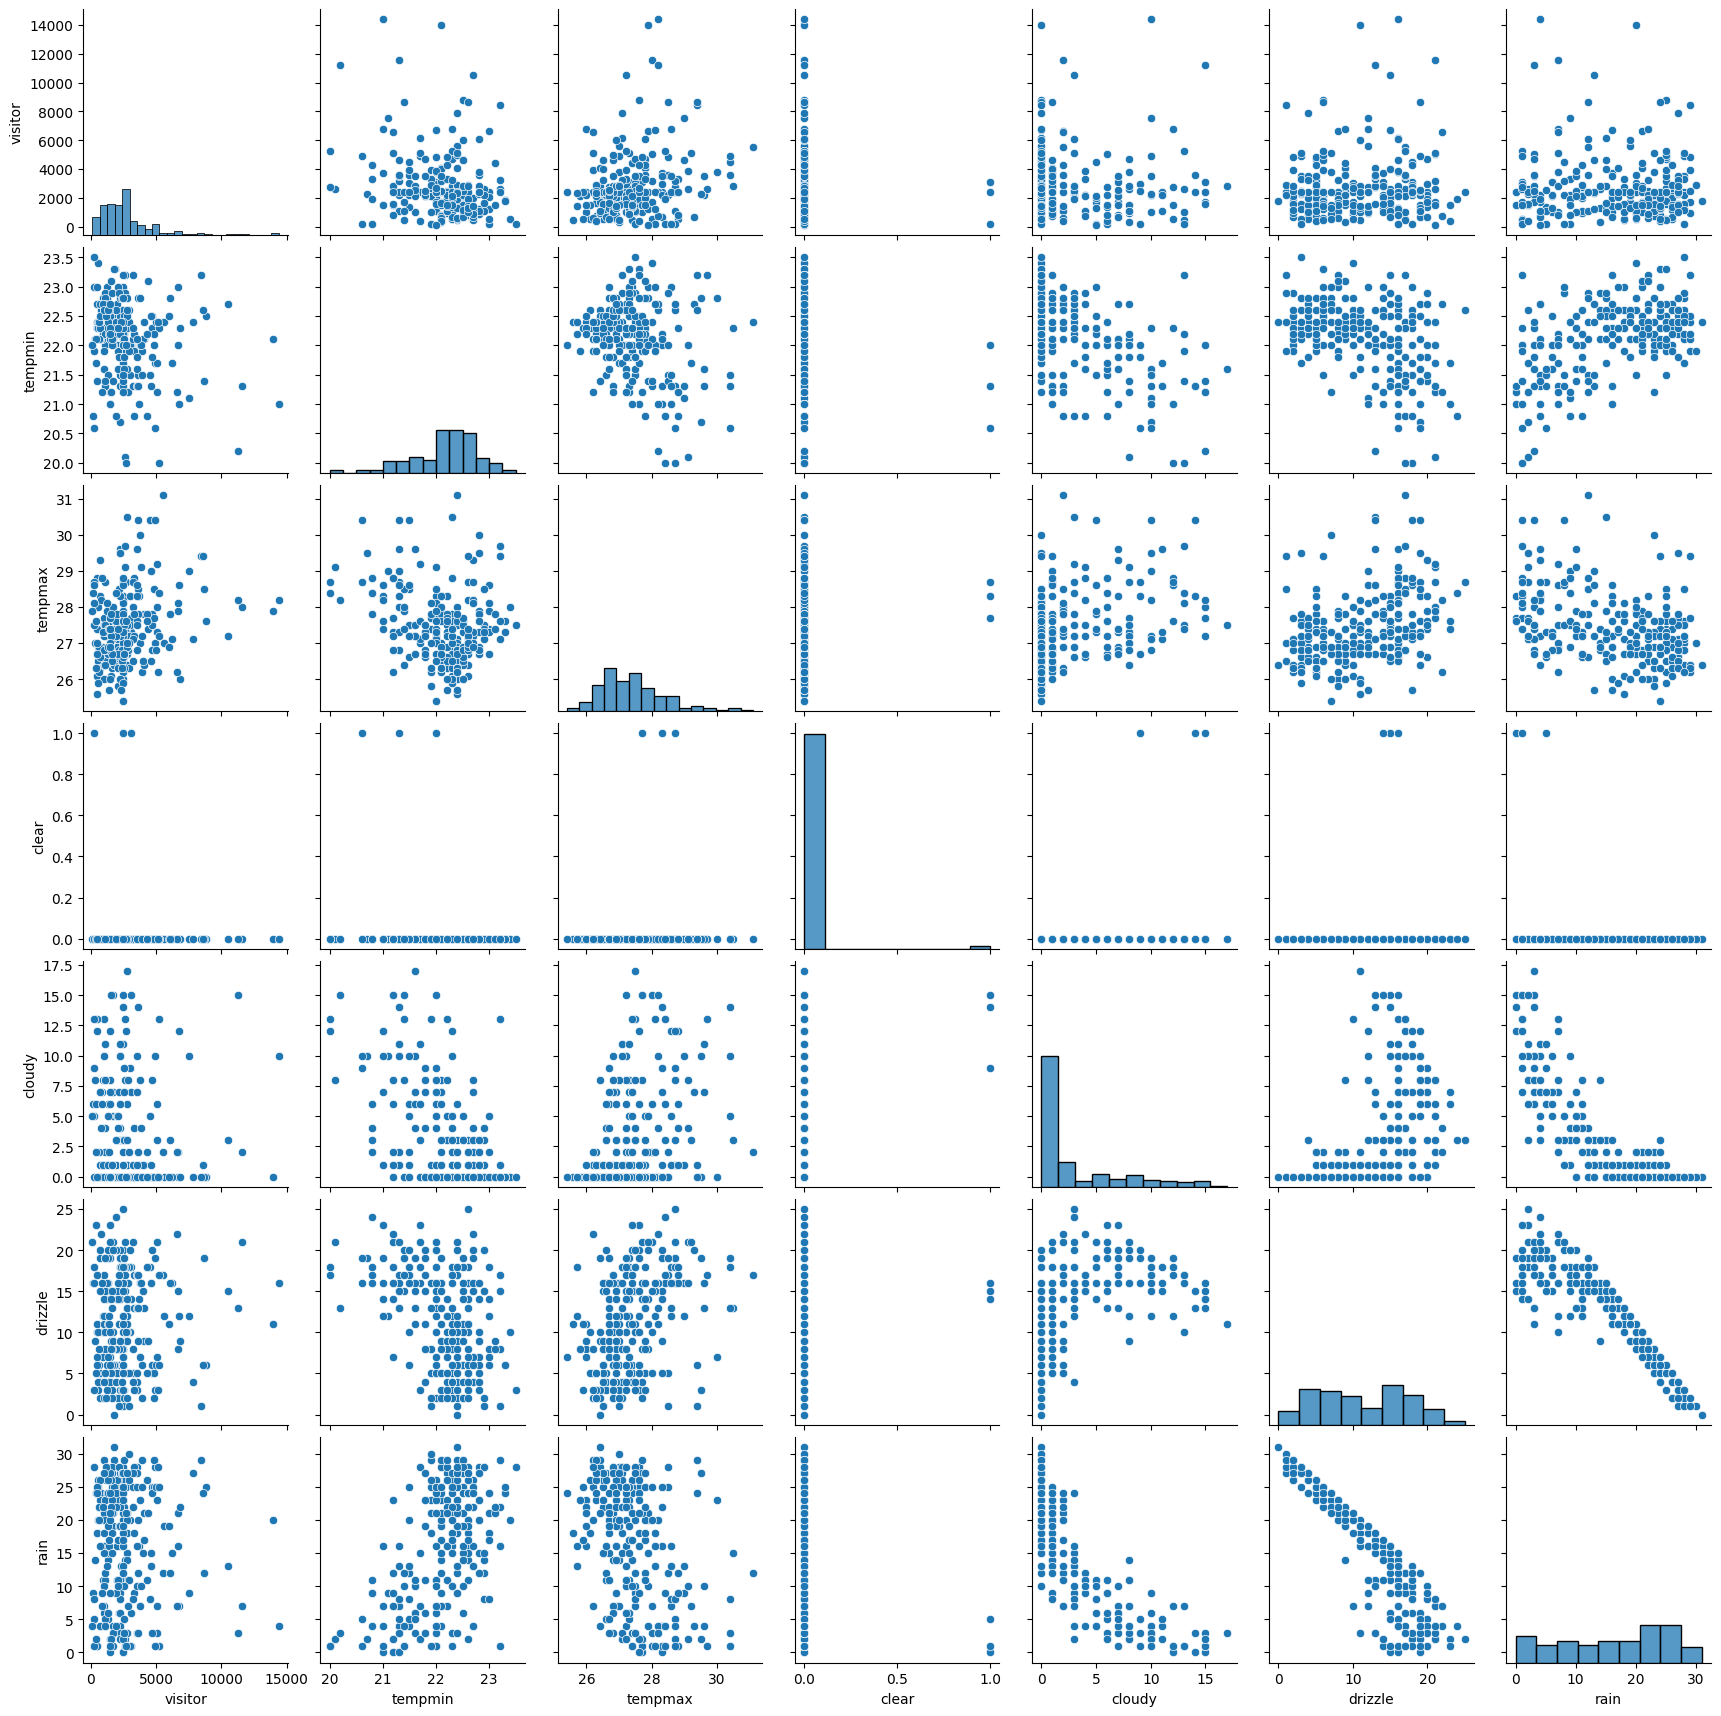

In [ ]:
sns.pairplot(train_data)

In [ ]:
# summary
train_data.describe()

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
count,249,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012-03-08 17:49:52.771084288,2721.940161,22.136948,27.402410,0.012048,2.903614,11.224900,16.317269
min,1999-02-28 00:00:00,120.000000,20.000000,25.400000,0.000000,0.000000,0.000000,0.000000
25%,2005-07-31 00:00:00,1400.000000,21.800000,26.700000,0.000000,0.000000,6.000000,9.000000
50%,2012-02-29 00:00:00,2301.000000,22.300000,27.200000,0.000000,1.000000,11.000000,18.000000
75%,2018-12-31 00:00:00,3241.000000,22.600000,27.900000,0.000000,5.000000,16.000000,24.000000
max,2024-11-30 00:00:00,14382.000000,23.500000,31.100000,1.000000,17.000000,25.000000,31.000000
std,NaN,2188.036441,0.632328,0.982505,0.109321,4.209095,6.042659,8.946061


In [ ]:
# cek missing values
train_data.isnull().sum()

,0
date,0
visitor,0
tempmin,0
tempmax,0
clear,0
cloudy,0
drizzle,0
rain,0


In [ ]:
# cek feature correlation
corr = train_data.corr()
corr['visitor']

,visitor
date,0.304890
visitor,1.000000
tempmin,-0.212004
tempmax,0.257354
clear,-0.041090
cloudy,0.004475
drizzle,0.049678
rain,-0.020002


<Axes: >

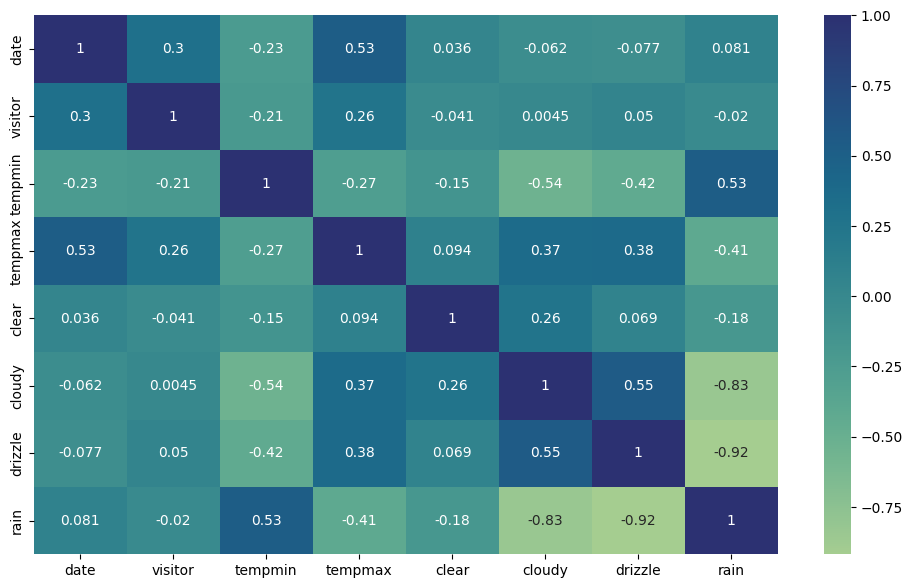

In [ ]:
# correlation
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='crest')

### Data Preprocessing

In [ ]:
X_train=train_data.drop('visitor', axis=1)
X_train= train_data.drop('date', axis=1)
y_train=train_data['visitor']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())

])

X_train_scaled = scale_pipe.fit_transform(X_train)

### Training Random Forests Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1)

forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=42)

### Evaluating Random Forests Regressor

In [ ]:
from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
    """
    Take the input data, model and labels and return predictions

    """

    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    mape = np.mean(np.abs((labels - preds) / labels)) * 100
    rmse = np.sqrt(mse)
    print("RMSE: ",rmse)
    print("MAPE: ",mape)

    return

In [ ]:
predict(X_train_scaled, forest_reg, y_train)

RMSE:  1.3477051742127694e-12
MAPE:  1.8275731309773255e-14


### Improving Random Forests

In [ ]:
forest_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

use Grid Search to find best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators':[100,200,300],
    'max_leaf_nodes':list(range(0,50))}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=5)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18, 19,
                                            20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, ...],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_leaf_nodes': 49, 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_leaf_nodes=49, n_estimators=200,
                      random_state=42)

In [ ]:
forest_best = grid_search.best_estimator_

In [ ]:
predict(X_train_scaled, forest_best, y_train)

RMSE:  31.5439232185673
MAPE:  1.7696755512614097


In [ ]:
#download pred_train excel
pred_train.to_excel('pred_train.xlsx', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_excel'

In [ ]:
predict = pd.DataFrame(pred_train, pred_test columns=['visitor'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1094053286.py, line 1)

### Feature Importance

In [ ]:
feat_import = forest_best.feature_importances_

feat_dict ={

    'Features': X_train.columns,
    'Feature Importance': feat_import
}

pd.DataFrame(feat_dict)

,Features,Feature Importance
0,visitor,0.998196
1,tempmin,0.000039
2,tempmax,0.000841
3,clear,0.000000
4,cloudy,0.000847
5,drizzle,0.000037
6,rain,0.000040


### Evaluating the Model on the Test Set

In [ ]:
X_test = test_data.drop('visitor', axis=1)
X_test = test_data.drop('date', axis=1)
y_test = test_data['visitor']
test_scaled = scale_pipe.transform(X_test)

In [ ]:
predict(test_scaled, forest_best, y_test)

RMSE:  100.04064056435449
MAPE:  4.5510873799309115


Visualisasi

## Pemodelan

### LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Features
features = monthly_data.drop(columns=['date']).values

In [ ]:
# Scaling semua fitur
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# sequence multi-fitur (3D)
def create_sequences_multifeature(dataset, window):
    X, y = [], []
    for i in range(window, len(dataset)):
        X.append(dataset[i-window:i, :])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [ ]:
        window_size = 12
X, y = create_sequences_multifeature(scaled_features, window_size)

print("Shape X:", X.shape)

Shape X: (300, 12, 7)


In [ ]:
# split train
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Model LSTM
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(16))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0219 - val_loss: 0.0319
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0200 - val_loss: 0.0327
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0212 - val_loss: 0.0408
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - val_loss: 0.0339
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - val_loss: 0.0344
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - val_loss: 0.0285
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0143 - val_loss: 0.0451
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182 - val_loss: 0.0385
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186 - val_loss: 0.0306
Epoch 10/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0305 - val_loss: 0.0291
Epoch 11/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179 - val_loss: 0.0330
Epoch 12/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170 - val_loss: 0

In [ ]:
# Prediction
y_pred_scaled = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step


In [ ]:
y_pred_full = np.zeros((len(y_pred_scaled), scaled_features.shape[1]))
y_pred_full[:,0] = y_pred_scaled[:,0]
y_pred = scaler.inverse_transform(y_pred_full)[:,0]

y_test_full = np.zeros((len(y_test), scaled_features.shape[1]))
y_test_full[:,0] = y_test
y_test_inv = scaler.inverse_transform(y_test_full)[:,0]

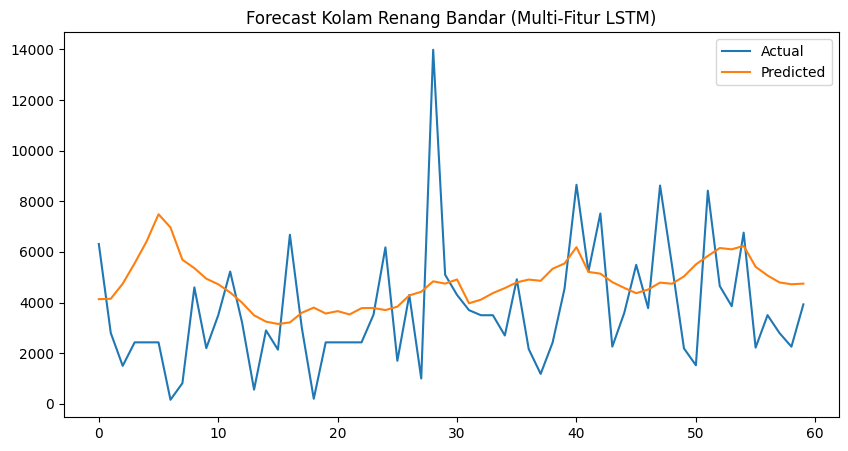

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Forecast Kolam Renang Bandar (Multi-Fitur LSTM)")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Evaluation
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred))
maels = mean_absolute_error(y_test, y_pred)
mapels = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE: %f" % (rmse_ls))
print("MAE: %f" % (maels))
print("MAPE: %f" % (mapels))

RMSE: 4831.880939
MAE: 4743.084543
MAPE: 5092323.513285


# GRU

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU, Dense

### konfigurasi epoch 30 batchsize 4

In [ ]:
# Konfigurasi
df = monthly_data
DATETIME_COL = 'date'
TARGET_COL = 'visitor'
FEATURE_COLS = ['tempmin', 'tempmax', 'clear', 'cloudy', 'drizzle', 'rain']
WINDOW = 7
TEST_SIZE = 0.1
VAL_SIZE = 0.1
EPOCHS = 30
BATCH_SIZE = 4

In [ ]:
# Normalisasi
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[FEATURE_COLS])
y_scaled = scaler_y.fit_transform(df[[TARGET_COL]])

In [ ]:
# Membuat sequence
Xs, ys = [], []
for i in range(len(X_scaled) - WINDOW):
    Xs.append(X_scaled[i:i+WINDOW])
    ys.append(y_scaled[i+WINDOW])
X_seq, y_seq = np.array(Xs), np.array(ys)

In [ ]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=TEST_SIZE+VAL_SIZE, shuffle=False)
val_ratio = VAL_SIZE / (TEST_SIZE + VAL_SIZE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-val_ratio, shuffle=False)

In [ ]:
# Model GRU
gru_model = Sequential([
    GRU(16, activation='relu', input_shape=(WINDOW, len(FEATURE_COLS))),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train GRU
history_gru = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

In [ ]:
# Evaluasi
y_pred_scaled = gru_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"GRU - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
GRU - MAE: 2306.21, RMSE: 2614.75, MAPE: 83.75%


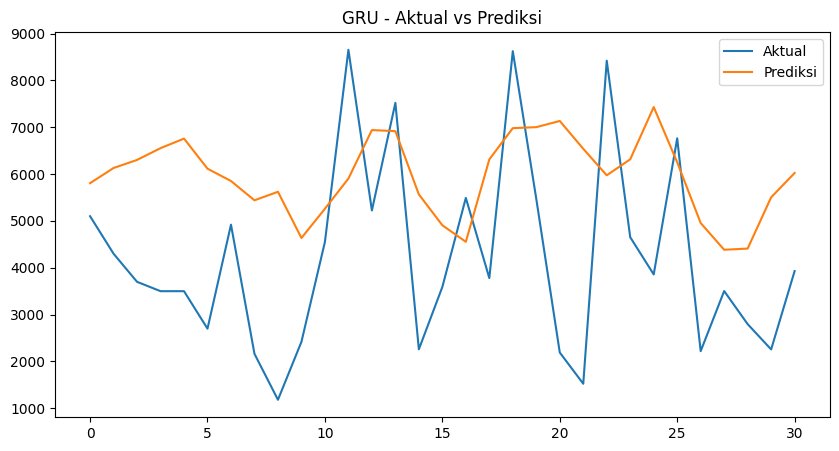

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_true, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title("GRU - Aktual vs Prediksi")
plt.legend()
plt.show()

## pakai earling stop

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# feature & target
features = ['tempmin', 'tempmax', 'clear', 'cloudy', 'drizzle', 'rain']
target = 'visitor'

In [ ]:
# Normalisasi scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

In [ ]:
# dimensi 3D
window_size = 7
X_seq, y_seq = [], []
for i in range(len(X_scaled) - window_size):
    X_seq.append(X_scaled[i:i+window_size])
    y_seq.append(y_scaled[i+window_size])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

print("Shape X:", X.shape)
X

Shape X: (300, 12, 7)


array([[[0.10556092, 0.63157895, 0.14035088, ..., 0.        ,
         0.16      , 0.87096774],
        [0.02966745, 0.60526316, 0.12280702, ..., 0.        ,
         0.4       , 0.58064516],
        [0.16765558, 0.63157895, 0.22807018, ..., 0.        ,
         0.36      , 0.70967742],
        ...,
        [0.12998482, 0.60526316, 0.31578947, ..., 0.17647059,
         0.16      , 0.77419355],
        [0.10556092, 0.52631579, 0.19298246, ..., 0.05882353,
         0.24      , 0.74193548],
        [0.0313923 , 0.63157895, 0.19298246, ..., 0.        ,
         0.2       , 0.83870968]],

       [[0.02966745, 0.60526316, 0.12280702, ..., 0.        ,
         0.4       , 0.58064516],
        [0.16765558, 0.63157895, 0.22807018, ..., 0.        ,
         0.36      , 0.70967742],
        [0.09866152, 0.60526316, 0.28070175, ..., 0.        ,
         0.4       , 0.64516129],
        ...,
        [0.10556092, 0.52631579, 0.19298246, ..., 0.05882353,
         0.24      , 0.74193548],
        [0.0

In [ ]:
# split training and testing
train_size = int(len(X_seq) * 0.8)
val_size = int(len(X_seq) * 0.1)

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size+val_size], y_seq[train_size:train_size+val_size]
X_test, y_test = X_seq[train_size+val_size:], y_seq[train_size+val_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:",X_val.shape)

X_train shape: (244, 7, 6)
X_test shape: (31, 7, 6)
X_val shape: (30, 7, 6)


In [ ]:
# Model GRU
hidden_unit = 64
learning_rate = 0.0001

model = Sequential()
model.add(GRU(hidden_unit, activation='tanh', return_sequences=False, input_shape=(window_size, len(features))))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=4,
    verbose=1
)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0189 - val_loss: 0.0351
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185 - val_loss: 0.0352
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - val_loss: 0.0357
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0345
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - val_loss: 0.0358
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - val_loss: 0.0357
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - val_loss: 0.0346
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - val_loss: 0.0347
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0347
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0130 - val_loss: 0.0348
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0351
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - val_l

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


In [ ]:
# evaluation
mape = mean_absolute_percentage_error(y_test_inv, y_pred)
print(f"MAPE: {mape*100:.2f}%")

MAPE: 65.71%


###visualisasi

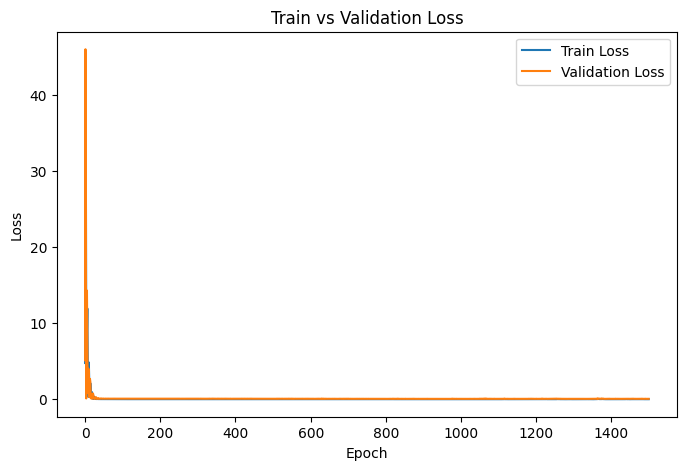

In [ ]:
# plot loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

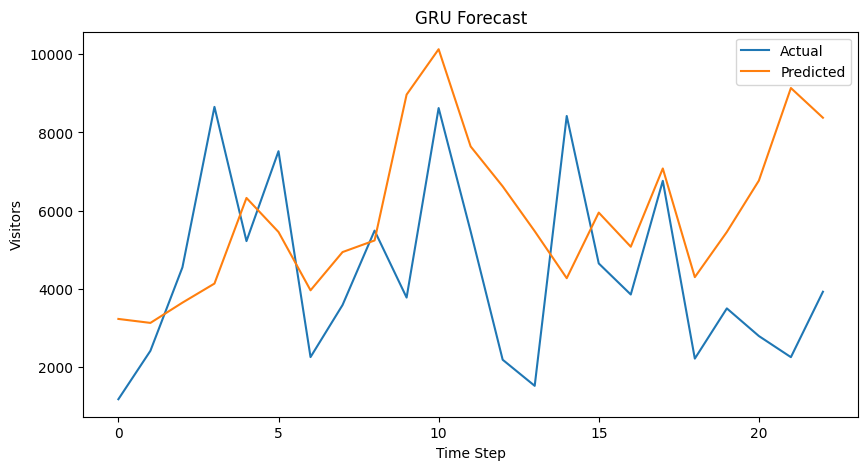

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('GRU Forecast')
plt.xlabel('Time Step')
plt.ylabel('Visitors')
plt.legend()
plt.show()

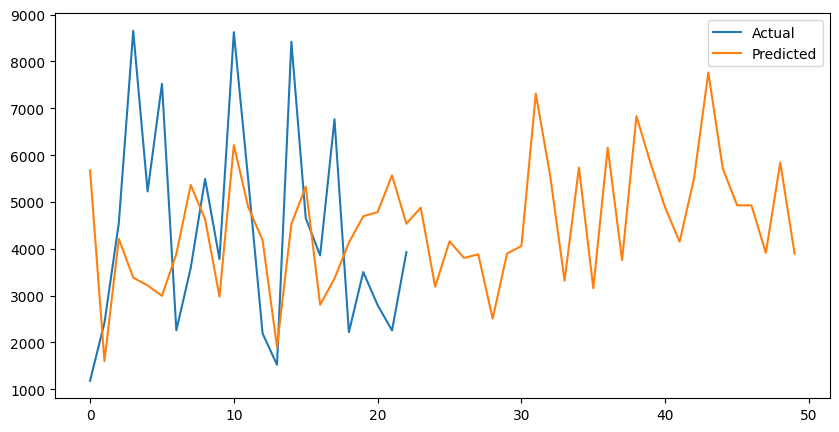

In [ ]:
# plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()

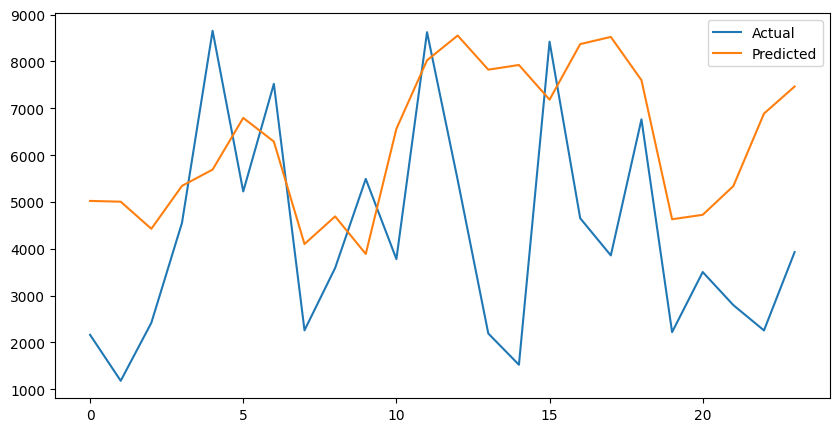

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual')
plt.plot(range(len(y_test_inv)), y_pred, label='Predicted')
plt.legend()
plt.show()

#XG Boost

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
X = df[['tempmin', 'tempmax', 'clear', 'cloudy', 'drizzle', 'rain']]
y = df['visitor']

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (201, 6)
Shape X_test: (51, 6)


In [ ]:
# Model XGBoost
model = XGBRegressor(
    n_estimators=50,
    learning_rate=0.5,
    max_depth=3,
    random_state=42
)

In [ ]:
# training
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.2f}")
print(f"MAPE : {mape:.2f}")

MAE  : 1877.06
RMSE : 2486.03
R2   : -0.26
MAPE : 141.27


# ARIMA

In [ ]:
!pip3 install arch yfinance pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.2 MB/s eta 0:00:00


In [ ]:
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
monthly_data

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14
...,...,...,...,...,...,...,...,...
307,2024-08-31,2220.0,21.3,29.6,0,11,16,4
308,2024-09-30,3503.0,21.6,29.6,0,7,13,10
309,2024-10-31,2797.0,22.3,30.5,0,3,13,15
310,2024-11-30,2257.0,22.8,29.5,0,0,3,27


### Splitting the Data

In [ ]:
size = int(len(monthly_data)*0.8)
monthly_data, monthly_test = monthly_data.iloc[:size], monthly_data.iloc[size:]
monthly_test

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
249,2019-10-31,4500.0,21.5,30.4,0,5,18,8
250,2019-11-30,4800.0,22.0,28.5,0,0,5,25
251,2019-12-31,4824.0,22.2,27.7,0,0,2,29
252,2020-01-31,6314.0,22.5,27.4,0,0,3,28
253,2020-02-29,2800.0,22.6,27.0,0,0,2,27
...,...,...,...,...,...,...,...,...
307,2024-08-31,2220.0,21.3,29.6,0,11,16,4
308,2024-09-30,3503.0,21.6,29.6,0,7,13,10
309,2024-10-31,2797.0,22.3,30.5,0,3,13,15
310,2024-11-30,2257.0,22.8,29.5,0,0,3,27


### Fitting a Model

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from pmdarima.arima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

Text(0.5, 1.0, 'Distribution of Visitor')

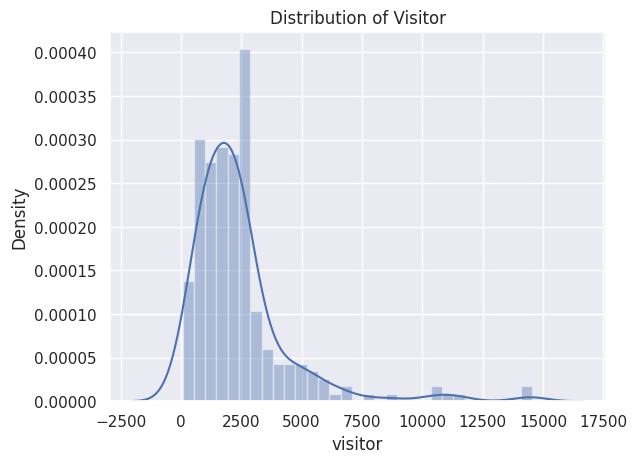

In [ ]:
sns.distplot(monthly_data['visitor'])
plt.title('Distribution of Visitor')
# plt.savefig('DistributionVisitor.jpg')

In [ ]:
seasonal = seasonal_decompose(monthly_data['visitor'],model='multiplicative', period=12)
fig = plt.figure()
fig = seasonal.plot()
fig.set_size_inches(10, 8)
# fig.savefig("ETS.jpg")

NameError: name 'seasonal_decompose' is not defined

In [ ]:
pmdarima.arima.AutoARIMA

NameError: name 'pmdarima' is not defined

In [ ]:
plot_acf(monthly_data['visitor'])
# plt.savefig('1_ACF.jpg');

NameError: name 'plot_acf' is not defined

In [ ]:
result = adfuller(monthly_data.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

AttributeError: 'DataFrame' object has no attribute 'value'

#auto

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# feature & target
target = 'visitor'
exog = ['tempmin', 'tempmax', 'clear', 'cloudy', 'drizzle', 'rain']

###seasonal

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

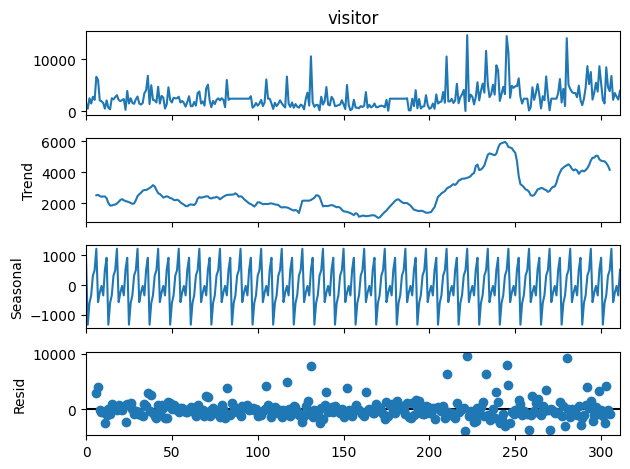

In [ ]:
series = monthly_data['visitor']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

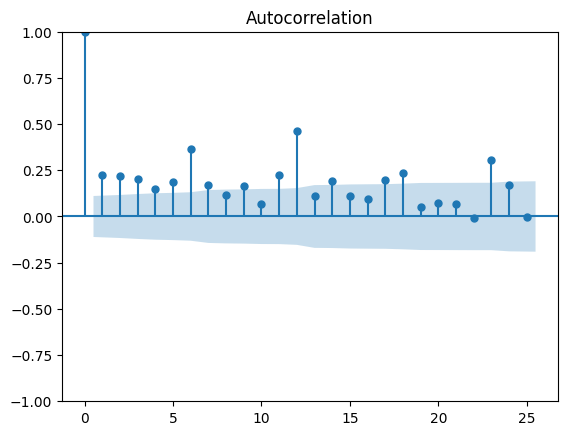

In [ ]:
plot_acf(monthly_data['visitor'])
plt.show()

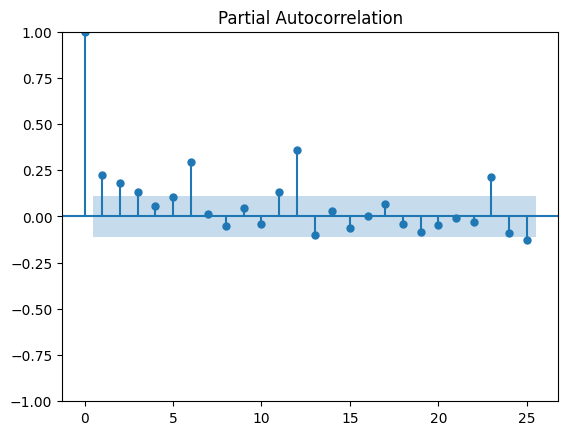

In [ ]:
plot_pacf(monthly_data['visitor'])
plt.show()

### Uji Stasioner ADF (Augmented Dickey-Fuller test)

In [ ]:
result = adfuller(monthly_data[target])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Data stasioner (tidak perlu differencing).")
else:
    print("Data tidak stasioner (pertimbangkan differencing atau transformasi).")

ADF Statistic: -1.999621
p-value: 0.286739
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Data tidak stasioner (pertimbangkan differencing atau transformasi).


In [ ]:
# differencing agar stasioner
differenced_data = monthly_data[target].diff().dropna()
differenced_data.head()

,visitor
1,-1100.0
2,2000.0
3,-1000.0
4,1300.0
5,-600.0


In [ ]:
# Uji ADF setelah differencing
result = adfuller(differenced_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Data stasioner (tidak perlu differencing).")
else:
    print("Data tidak stasioner (pertimbangkan differencing atau transformasi).")

ADF Statistic: -8.774949
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Data stasioner (tidak perlu differencing).


<Axes: >

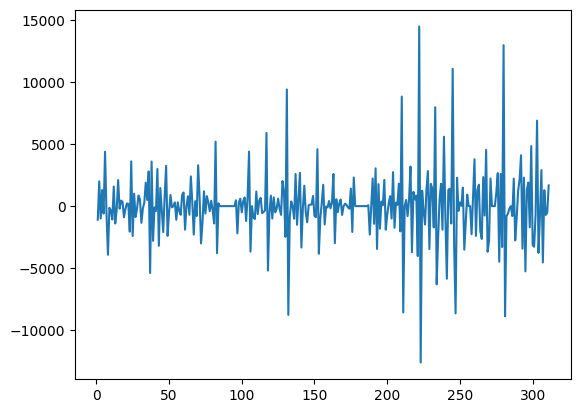

In [ ]:
differenced_data.plot()

# Plot Autocorrelation & Partial Autocorrelation

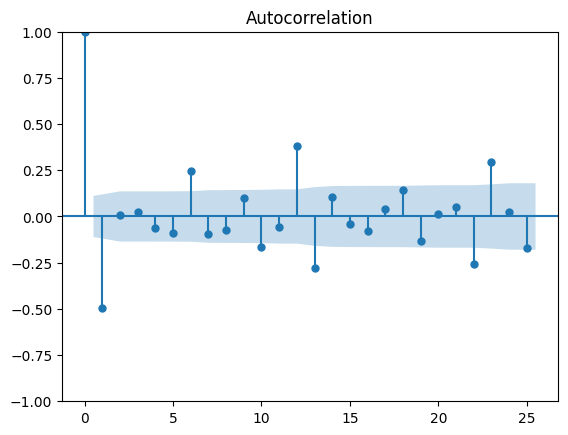

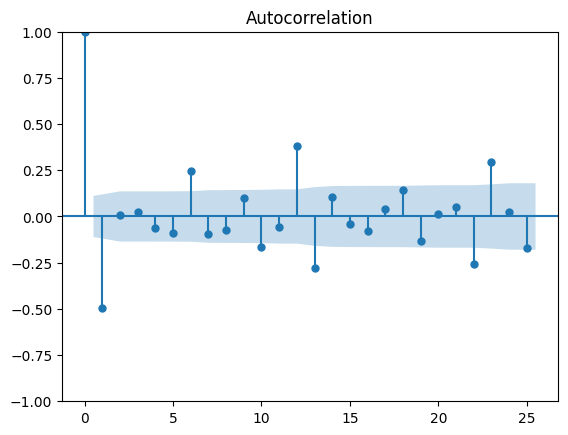

In [ ]:
plot_acf(differenced_data)

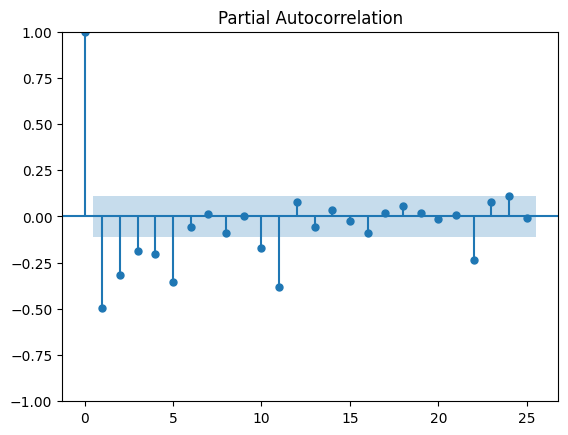

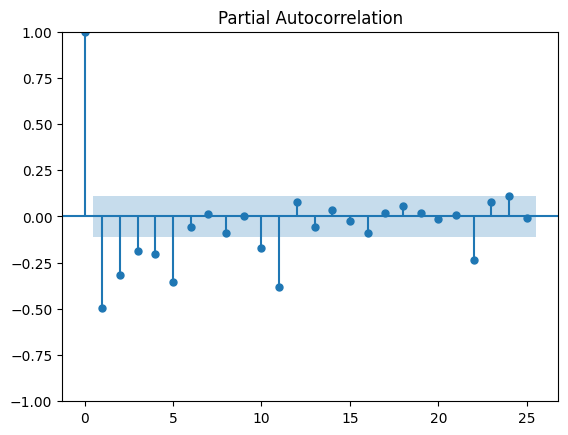

In [ ]:
plot_pacf(differenced_data)

In [ ]:
train_size = int(len(monthly_data) * 0.8)
y_train, y_test = target[:train_size], target[train_size:]
X_train, X_test = exog[:train_size], exog[train_size:]

# auto arimaaaaa

In [ ]:
# model fit arimax with increased iterations
model = SARIMAX(y_train, order=(1,1,1))
model_fit = model.fit(disp=False, maxiter=1000) # Increased maxiter

# You can then proceed with prediction and evaluation as before
# forecast = model_fit.get_forecast(steps=len(test_y), exog=test_exog)
# pred = forecast.predicted_mean
# ... rest of your evaluation code

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip install --upgrade numpy pmdarima

# Install conda untuk downgrade ke python 3.10

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda --version

conda 24.11.2


In [ ]:
!conda create -n py310 python=3.10 -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/py310

  added / updated specs:
    - python=3.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    ld_impl_linux-64-2.44      |       h1423503_1         660 KB  conda-forge
    libexpat-2.7.1             |       hecca717_0          73 KB  conda-forge
    libffi-3.4.6               |       h2dba641_1          56 KB  conda-forge
    libgcc-15.1.0              |       h767d61c_4         805 KB  conda-forge
    libgcc-ng-15.1.0           |       h69a702a_4          29 KB  conda-forge
    li

In [ ]:
!conda activate py310 && pip install numpy pmdarima statsmodels scikit-learn pandas


CondaError: Run 'conda init' before 'conda activate'



In [ ]:
# atasi connda error
!eval "$(conda shell.bash hook)"

In [ ]:
!eval "$(conda shell.bash hook)" && conda activate py310 && pip install numpy pmdarima statsmodels scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 132.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 121.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 117.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 136.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 99.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 51.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [pmdarima]


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

# Setelah restart runtime, jalankan:
!eval "$(conda shell.bash hook)" && conda create -n py310 python=3.10 -y
!eval "$(conda shell.bash hook)" && conda activate py310 && pip install numpy pmdarima statsmodels scikit-learn pandas

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/py310

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/noarch::ca-certificates-2025.8.3-hbd8a1cb_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.44-h1423503_1 
  libexpat           conda-forge/linux-64::libexpat-2.7.1-hecca717_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-forge/linux-6

In [ ]:
!eval "$(conda shell.bash hook)" && conda activate py310 && ...

/bin/bash: line 1: ...: command not found


# ARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
monthly_data

,date,visitor,tempmin,tempmax,clear,cloudy,drizzle,rain
0,1999-01-31,1600.0,22.4,26.2,0,0,4,27
1,1999-02-28,500.0,22.3,26.1,0,0,10,18
2,1999-03-31,2500.0,22.4,26.7,0,0,9,22
3,1999-04-30,1500.0,22.3,27.0,0,0,10,20
4,1999-05-31,2800.0,22.5,26.9,0,3,14,14
...,...,...,...,...,...,...,...,...
307,2024-08-31,2220.0,21.3,29.6,0,11,16,4
308,2024-09-30,3503.0,21.6,29.6,0,7,13,10
309,2024-10-31,2797.0,22.3,30.5,0,3,13,15
310,2024-11-30,2257.0,22.8,29.5,0,0,3,27


In [ ]:
target = monthly_data['visitor']
exog = monthly_data[['tempmin', 'tempmax', 'clear', 'cloudy', 'drizzle', 'rain']]

In [ ]:
# split data
split_index = int(len(data)*0.8)
train_y, test_y = target[:split_index], target[split_index:]
train_exog, test_exog = exog[:split_index], exog[split_index:]

In [ ]:
model = SARIMAX(train_y, exog=train_exog, order=(1,1,1))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model_fit.get_forecast(steps=len(test_y), exog=test_exog)
pred = forecast.predicted_mean

ValueError: Prediction must have `end` after `start`.

In [ ]:
# prediksi
pred = model_fit.predict(start=split_index, end=len(monthly_data)-1, exog=test_exog)

ValueError: Prediction must have `end` after `start`.

# python

In [ ]:
!python --version

Python 3.11.11


In [ ]:
# turunkan versi python menjadi 3.10
!conda create -n py310 python=3.10 -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/py310

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/noarch::ca-certificates-2025.8.3-hbd8a1cb_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.44-h1423503_1 
  libexpat           conda-forge/linux-64::libexpat-2.7.1-hecca717_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-forge/linux-64::libgcc-15.1.0-h767d61c_4 


In [ ]:
!python --version

Python 3.11.11


In [ ]:
%%bash
set -e

# 1. Update repo dan install python3.10
apt-get update -y
apt-get install -y software-properties-common
add-apt-repository ppa:deadsnakes/ppa -y
apt-get update -y
apt-get install -y python3.10 python3.10-venv python3.10-dev python3.10-distutils

# 2. Daftarkan ke update-alternatives dan wajibkan prioritas 1
update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2
update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
update-alternatives --set python3 /usr/bin/python3.10

# 3. Install pip untuk Python 3.10
curl -sSL https://bootstrap.pypa.io/get-pip.py | python3

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5,340 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,942 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,272 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,297 kB]
Get:13 https://ppa.launchpadcontent.ne

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
update-alternatives: error: alternative path /usr/bin/python3.11 doesn't exist


CalledProcessError: Command 'b'set -e\n\n# 1. Update repo dan install python3.10\napt-get update -y\napt-get install -y software-properties-common\nadd-apt-repository ppa:deadsnakes/ppa -y\napt-get update -y\napt-get install -y python3.10 python3.10-venv python3.10-dev python3.10-distutils\n\n# 2. Daftarkan ke update-alternatives dan wajibkan prioritas 1\nupdate-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2\nupdate-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1\nupdate-alternatives --set python3 /usr/bin/python3.10\n\n# 3. Install pip untuk Python 3.10\ncurl -sSL https://bootstrap.pypa.io/get-pip.py | python3\n'' returned non-zero exit status 2.

# skip

### Visualisasi

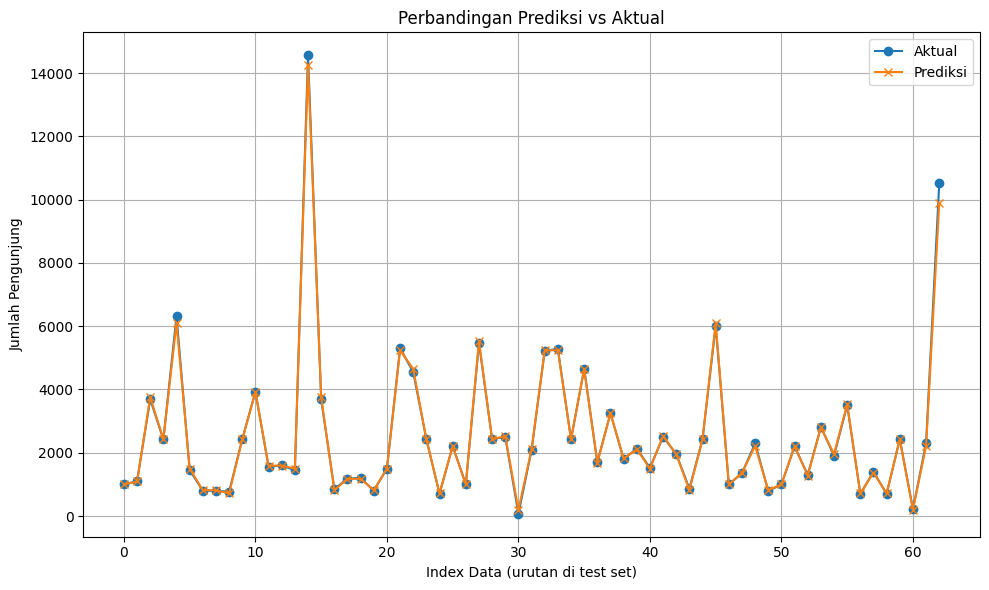

In [ ]:
import matplotlib.pyplot as plt

# Prediksi
y_pred = forest_best.predict(test_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Aktual', marker='o')
plt.plot(y_pred, label='Prediksi', marker='x')
plt.xlabel('Index Data (urutan di test set)')
plt.ylabel('Jumlah Pengunjung')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


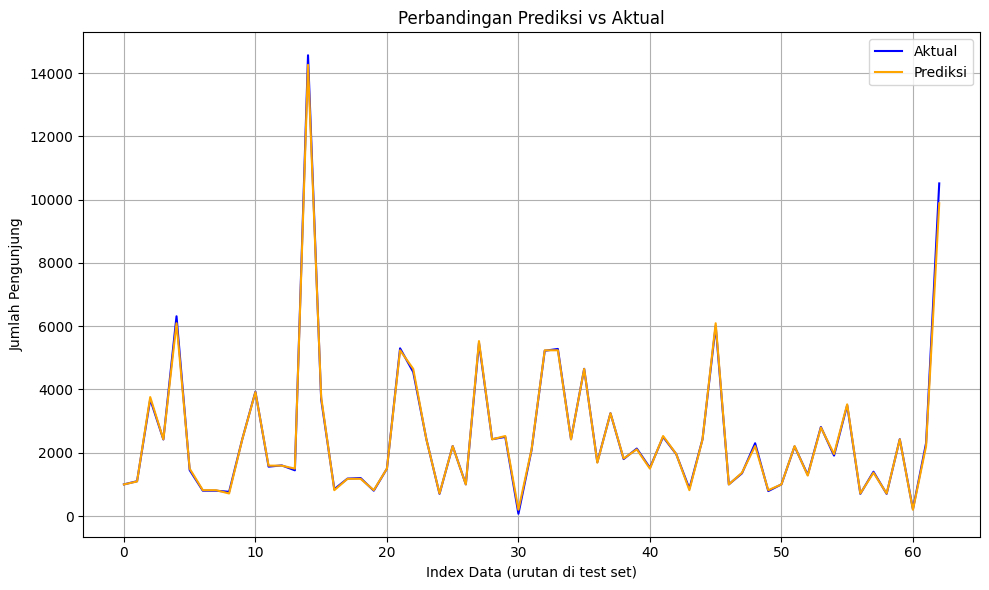

In [ ]:
import matplotlib.pyplot as plt

# Prediksi
y_pred = forest_best.predict(test_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Aktual', color='blue')
plt.plot(y_pred, label='Prediksi', color='orange')
plt.xlabel('Index Data (urutan di test set)')
plt.ylabel('Jumlah Pengunjung')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


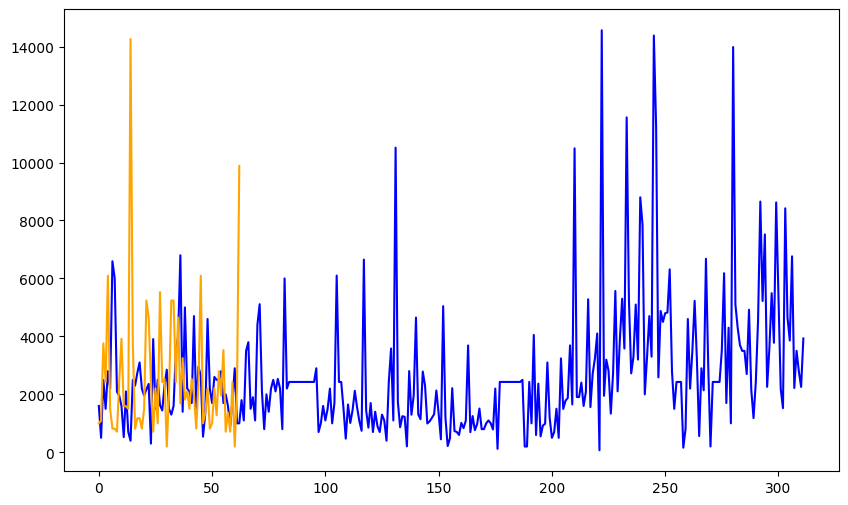

In [ ]:
# visualisasi seluruh data tahun 1999-2024 actual vs predict
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['visitor'], label='Aktual', color='blue')
plt.plot(y_pred, label='Prediksi', color='orange')

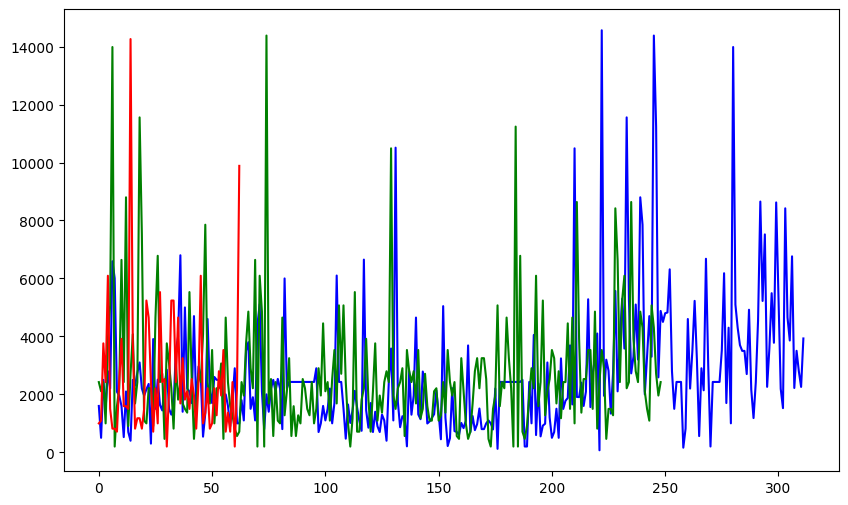

In [ ]:
# Plot Data Pengunjung tahun 1999-2024 terdapat preditrain data, test data dan monthly_data['visitor']
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['visitor'], label='Aktual', color='blue')
plt.plot(y_pred, label='Train', color='green')
plt.plot(pred_test, label='Test', color='red')

In [ ]:
y_test.values

array([ 1000. ,  1100. ,  3690. ,  2419. ,  6314. ,  1450. ,   800. ,
         800. ,   765. ,  2428.3,  3929. ,  1560. ,  1600. ,  1445. ,
       14564. ,  3688. ,   850. ,  1182. ,  1200. ,   800. ,  1497. ,
        5300. ,  4552. ,  2428.3,   700. ,  2212. ,  1000. ,  5470. ,
        2428.3,  2500. ,    70. ,  2087. ,  5223. ,  5281. ,  2428.3,
        4652. ,  1700. ,  3249. ,  1800. ,  2132. ,  1524. ,  2500. ,
        1956. ,   867. ,  2428.3,  6008. ,  1000. ,  1350. ,  2300. ,
         788. ,  1000. ,  2200. ,  1300. ,  2815. ,  1910. ,  3500. ,
         700. ,  1400. ,   700. ,  2428.3,   216. ,  2305. , 10513. ])

In [ ]:
# Ambil semua fitur (tanpa kolom visitor & date)
X_all = monthly_data.drop(columns=['visitor', 'date'])

# Scaling dengan scaler yang sudah dilatih
X_all_scaled = scale_pipe.transform(X_all)

# Prediksi seluruh data
y_all_pred = forest_best.predict(X_all_scaled)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['date'], monthly_data['visitor'], label='Aktual', color='blue')
plt.plot(monthly_data['date'], y_all_pred, label='Prediksi', color='orange')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengunjung')
plt.title('Prediksi vs Aktual (1999–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- visitor


## merge data pred & date

In [ ]:
# merge pred_train, pred_test, date
pred_train = pd.DataFrame(pred_train, columns=['visitor'])
pred_test = pd.DataFrame(pred_test, columns=['visitor'])

#download excel
pred_train.to_excel('pred_train.xlsx', index=False)
pred_test.to_excel('pred_test.xlsx', index=False)


In [ ]:
pred = pd.DataFrame(pred_train, columns=['visitor'])
pred

,visitor
0,2423.270000
1,2106.875000
2,2423.270000
3,998.222222
4,3916.500000
...,...
244,5071.000000
245,4300.000000
246,2709.666667
247,1959.375000


In [ ]:
pred_test

array([ 2423.27      ,  2106.875     ,  2423.27      ,   998.22222222,
        3916.5       ,  5071.        , 13986.        ,   198.        ,
        1591.66666667,  2210.1875    ,  6640.66666667,  2423.27      ,
        8800.        ,   906.66666667,  2709.66666667,  4075.        ,
        1685.66666667,  2423.27      , 11558.        ,  7520.        ,
        1092.5       ,   998.22222222,  2210.1875    ,  2210.1875    ,
         906.66666667,  4650.        ,  6781.5       ,  2423.27      ,
        2709.66666667,   463.625     ,  3760.        ,  3066.66666667,
        2210.1875    ,   816.66666667,  3066.66666667,  1818.33333333,
        2423.27      ,  1685.66666667,  1498.        ,  1368.75      ,
        5529.5       ,  2528.25      ,   463.625     ,  1685.66666667,
        2709.66666667,  2423.27      ,  4075.        ,  7854.        ,
        2423.27      ,  1685.66666667,  3530.33333333,   998.22222222,
        2210.1875    ,  2210.1875    ,  3066.66666667,   463.625     ,
      

In [ ]:
# Merge data visitor & weather
pred = pd.merge(pred, monthly_data, left_on='date', right_on='time')
monthly_data

### model

In [ ]:
# model Random Forest Regression (10 decision trees)
model=RandomForestRegressor(n_estimators=200,random_state=0)

In [ ]:
#fitting model
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
# predict
y_pred=model.predict(x_test)
y_pred

array([2746.9715    , 1847.528     , 1751.042     , 7021.193     ,
       3623.185     , 3280.268     , 2553.3045    , 4248.2965    ,
       2203.488     , 4284.609     , 1950.2365    , 3655.3515    ,
       3565.6415    , 4316.177     , 2085.52      , 2420.567     ,
       2911.115     , 2238.3085    , 4068.9115    , 3728.856     ,
       1819.606     , 1788.031     , 3417.7215    , 3276.3395    ,
       2131.4455    , 3564.3025    , 1950.8055    , 3637.0765    ,
       2744.9435    , 3431.7445    , 2330.3575    , 4089.18      ,
       3422.786     , 1781.9415    , 2253.13383333, 1757.8905    ,
       2569.3825    , 4240.2465    , 3733.156     , 2163.3915    ,
       1219.323     , 2091.6075    , 3993.7195    , 2474.8665    ,
       1422.4585    , 2537.2955    , 2399.232     , 1792.163     ,
       3372.721     , 1577.0625    , 4356.492     , 2104.8765    ,
       3115.986     , 3579.3925    , 2896.7875    , 4223.4665    ,
       1870.2775    , 1986.9245    , 1719.771     , 4633.311  

In [ ]:
# Evaluation RMSE & MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 1900.77
MAPE: 113.76%


### visualisasi

In [ ]:
# read data excel
predict = pd.read_excel('/content/drive/MyDrive/Skripsi/KRBandar/predict.xlsx')
predict.head()

,date,visitor
0,1999-01-31,2423.270000
1,1999-02-28,2106.875000
2,1999-03-31,2423.270000
3,1999-04-30,998.222222
4,1999-05-31,3916.500000


AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

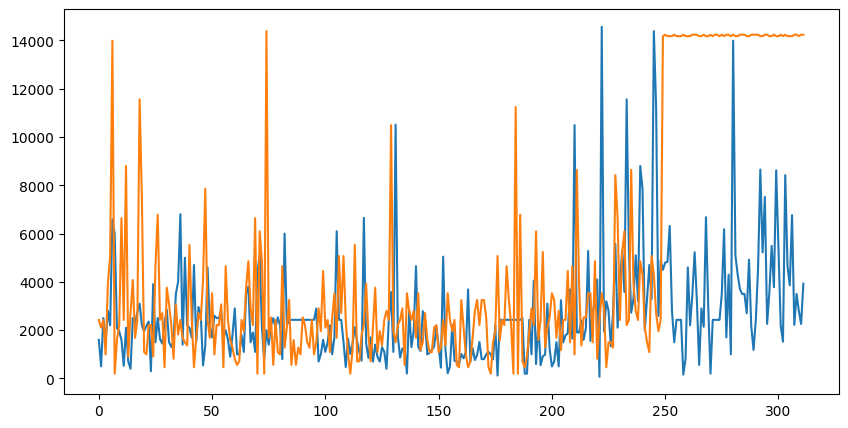

In [ ]:
# predict vs actua
plt.figure(figsize=(10,5))
plt.plot(monthly_data['date'], monthly_data['visitor'], label='Actual')
plt.plot(predict['date'], predict['visitor'], label='Predicted')
plt.legend()
plt.show()

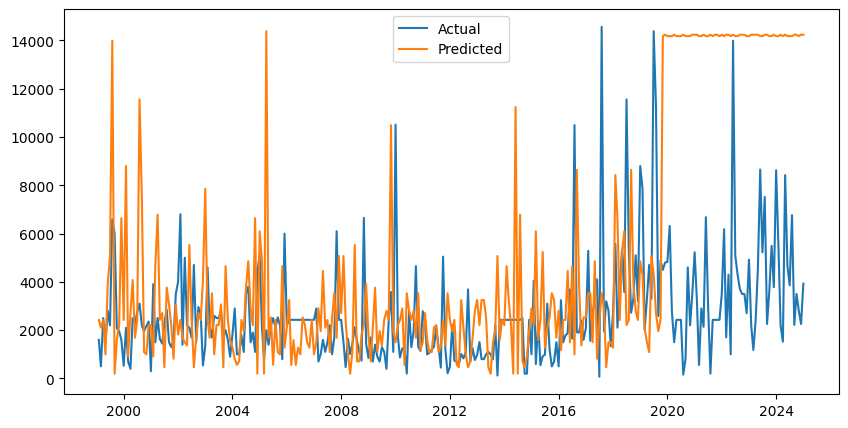

In [ ]:
# predict vs actua
plt.figure(figsize=(10,5))
plt.plot(monthly_data['date'], monthly_data['visitor'], label='Actual')
plt.plot(predict['date'], predict['visitor'], label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Prediksi vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Aktual', color='blue')
plt.plot(y_pred, label='Prediksi', color='orange')
plt.xlabel('Index Data (urutan di test set)')
plt.ylabel('Jumlah Pengunjung')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.6 MB/s eta 0:00:00


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 80.2 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
!pip uninstall numpy -y
!pip install numpy
!pip uninstall pmdarima statsmodels -y
!pip install pmdarima statsmodels

Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)


In [ ]:
!pip install pmdarima --no-deps

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject